<a href="https://colab.research.google.com/github/QLan9376/Cs44800_AI/blob/main/Qing_Lan_Csc44800_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* CCNY-Cs44800 Artificial Intelligence
* Student:Qing Lan
* Professor: Hunter McNichols


# Assignment 3: Machine Learning in Action

## Abstract

I travel a lot. I believe that traveling allows you to experience new things, it helps on open up your minds. Airbnb is my favorite holtel booking platform. I always wondering how people make their room booking decision. If a low price holtel really a top reason that attract people. 

So I picked the dataset _"New York City Airbnb Open Data"_ as my regression dataset, and the "US Airbnb Open Data" as my classification dataset.

I will use a Linear Regression to predict the realation between the Airbnb room prices and people's review preferance. I want to see if it's the case that the lower price room has higher reviews. And I am going to use Support Vector Machine to classify them for the types room such as it's a single private room or the entire room/apartment base on the rental's bedroom number and the price of the rental. 

# Section 1: Prepping the Regression datasets


The dataset _"New York City Airbnb Open Data"_ has 16 columns which as listing below:

### id,  name,  host_id, host-name, neighbourhood, room_type, price, number_of_reviews, reviews_per_month,etc.

Displaying the head of the dataset and output the first 15 rows using the python pandas module.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing 
from sklearn import svm
import numpy as np

I ran to the error that my python certificates is unable to insall during the read csv file process,so I would need a exception function to deal with problem.

In [ ]:
import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
url1 = "https://raw.githubusercontent.com/QLan9376/Cs44800_AI/main/AB_NYC_2019.csv"
nyc_airbnb_list = pd.read_csv(url1)

In [ ]:
nyc_airbnb_list.head(15)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


As we can see, this is a huge dataset. So,I am going clean it up. The only two cloumns which I need for my regression process are:

## 1.price  

the prices of the lisiting room/apt

## 2.number_of_reviews

the number of guests' review for each propety

In [ ]:
nyc_airbnb_list = nyc_airbnb_list.drop(["id", "name", "host_id", "host_name", "neighbourhood_group","neighbourhood",
                                        "latitude","longitude","room_type","minimum_nights","last_review","reviews_per_month",
                                        "calculated_host_listings_count","availability_365"],axis=1)


### Let's take a look on how the dataset looks like after dropping:

In [ ]:
nyc_airbnb_list.head(15)

,price,number_of_reviews
0,149,9
1,225,45
2,150,0
3,89,270
4,80,9
5,200,74
6,60,49
7,79,430
8,79,118
9,150,160


# Section 2: Linear Regression


My guess is that the lower the Airbnb price is, the higher reviews they will get. Who doesn't want a better price for goods, right?

So first of all, I will use pandas to extract features and prediction sets from the dataframe. I will use sklearn to create a training set and test set. Then reserve 20% of the dataset for testing.

In [ ]:
X = nyc_airbnb_list.iloc[:, :-1].values
y = nyc_airbnb_list.iloc[:, 1].values

reg_train, reg_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)


see what our model returns:


In [ ]:
reg = lm.LinearRegression()
reg.fit(reg_train, y_train)
sc = reg.score(reg_train, y_train)
print("Score: ", sc, "\n")

Score:  0.0022260699916160087 



In [ ]:
y_pred = reg.predict(reg_test)
m = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)

print("Intercept: ", reg.intercept_)
print("Mean Squared Error: ", m)
print("R-squared Value: ", r)

Intercept:  24.56685063088781
Mean Squared Error:  1983.3622190748965
R-squared Value:  0.0025715085998618825


In [ ]:
table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(table.head())

   Actual  Predicted
0       0  23.874244
1      13  23.008485
2       1  22.056150
3      17  24.004107
4       2  21.969575


### Create a scatter plot and the regression to create a regression line:


* the training data is the green dots, the test data is the blue dots, with a red regression line cutting through the data.

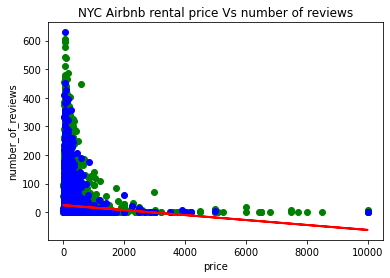

In [ ]:
plt.scatter(reg_train, y_train, color = 'green')
plt.scatter(reg_test, y_test,  color='blue')
plt.plot(reg_test, y_pred, color='red', linewidth = 2)
plt.title('NYC Airbnb rental price Vs number of reviews')
plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.show()

In [ ]:
print("R2 score: ", r2_score(y_test, y_pred))

R2 score:  0.0025715085998618825


Oops,base on this very low outcome score, it can be determined that the linear regression doesn't perform really well on this prediction and the data is not consider highly correlated. However, I think some other factors should be including in this prediction such as the location of the rentals. 

# Section 3: Preparing the Classification Dataset


We're all have been stucking at home for a long time due to the Covid19. Barcelona will be my next destination once we win this pandemic crisis. So when I see this dataset _'Airbnb dataset of barcelona city'_, it looks it's not a bad idea to start some preparation for now. 

There're 9 columns including in this dataset:

### room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude


Displaying the head of the dataset and output the first 15 rows using the python pandas module.

In [ ]:
import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
url2 = "https://raw.githubusercontent.com/QLan9376/Cs44800_AI/main/AB_Barcelona.csv"
barcelona_airbnb_list = pd.read_csv(url2)

I am going to display some random datas to indicate there're 2 different output under 'room_type'. 

In [ ]:
barcelona_airbnb_list.sample(15)

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
9638,Private room,Sant Martí,207,4.5,3,1.0,42.0,41.402322,2.197785
2668,Entire home/apt,Ciutat Vella,36,4.5,3,2.0,131.0,41.382889,2.170749
6468,Private room,Ciutat Vella,11,5.0,2,1.0,108.0,41.385870,2.182073
983,Entire home/apt,Sant Martí,111,5.0,6,3.0,240.0,41.401500,2.189050
697,Entire home/apt,Eixample,6,5.0,7,4.0,301.0,41.395247,2.165862
506,Entire home/apt,Les Corts,10,4.5,8,4.0,265.0,41.378751,2.124834
3896,Entire home/apt,Ciutat Vella,7,4.5,4,2.0,121.0,41.382962,2.178864
7424,Private room,Eixample,4,2.5,2,1.0,52.0,41.391126,2.161221
9006,Private room,Eixample,17,4.0,2,1.0,57.0,41.387953,2.160803
8457,Private room,Gràcia,17,4.5,2,1.0,42.0,41.413573,2.148415


The first thing to do is to drop some unrelated columns.The columns where I need for the clasification part are:

### 1.room_type

* which describe the type of the rental, datatype >>> string 

### 2. overall_satisfaction

* the rental satisfication scores from quest, datatype >>>float

### 3. bedrooms

* the number of bedrooms, datatype >>>float

### 4.price

* the prices of the rentals,datatype >>>float

## Displaying dataset after dropping

In [ ]:
barcelona_airbnb_list = barcelona_airbnb_list.drop(["neighborhood","reviews","accommodates","latitude","longitude"],axis=1)

In [ ]:
barcelona_airbnb_list.head(15)

,room_type,overall_satisfaction,bedrooms,price
0,Shared room,4.5,1.0,264.0
1,Shared room,4.0,1.0,129.0
2,Shared room,4.0,1.0,129.0
3,Shared room,5.0,1.0,72.0
4,Shared room,5.0,1.0,64.0
5,Shared room,4.0,1.0,45.0
6,Shared room,5.0,1.0,60.0
7,Shared room,4.5,1.0,289.0
8,Shared room,4.0,1.0,193.0
9,Shared room,4.5,1.0,133.0


Since we have the room_type as a categorical datatype, I am going to map the room_type to numeric values such as:

* entire home/apt >>>1
* Private room    >>>2

In [ ]:
encode = preprocessing.LabelEncoder()
sp = barcelona_airbnb_list[barcelona_airbnb_list.columns[:]].apply(encode.fit_transform)

Now the data is ready for next step.

# Section 4: Classification with the Support Vector Machine


First thing to do is to divide dataset as table x and y, then split them into train and test dataset. Again,20% data will be reserve for testing.

In [ ]:
x = sp.iloc[:, :-1].values
y = sp.iloc[:, 2].values

class_train, class_test, y_train, y_test = train_test_split(x, y, 
                                                               test_size = 0.2, random_state = 1)

Fit a classifier to the training set:

In [ ]:
classifier = svm.SVC()
classifier.fit(class_train, y_train)

score = classifier.score(class_test, y_test)
print("Mean Accuracy: ", score, "\n")

Mean Accuracy:  0.999604273842501 



### Displaying the prediction table after mapping:

In [ ]:
y_predict = classifier.predict(class_test)
table = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
print(table.head(15))

    Actual  Predicted
0        1          1
1        2          2
2        1          1
3        1          1
4        1          1
5        1          1
6        1          1
7        1          1
8        1          1
9        1          1
10       1          1
11       2          2
12       1          1
13       2          2
14       2          2


It looks like it outputs a high accurate score. However, the display of the mapping part looks a little wired. Probably we could not predict a type of the rentals only base on it's price, satisify scores and prices?

# Conclusion

Over all, this is a intersting AI learning process. I had the knowledge on how the Regression and Classification algorithms are processing. I leaned how to load the csv file using pandas and modify it, such as clean up the dataset, using sklearn into a training and test set, fit a linear regression,visualize it using matplotlib,etc.

What I planning to do to extend the project further would be make a better assumption and finishe the learning of how to visualize the classifier on a data plot.

Eventhough the out come is not very ideal, it's a great coding experience with jupyter notebook. I thing that's what ie realy matters.